In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np
import os

In [2]:
world_happiness_report = "Resources/rawdata/WHR20_DataForFigure2.1.csv"
fertility_world_data = "Resources/rawdata/World Data/Fertility.csv"
median_age_world_data = "Resources/rawdata/World Data/Median age.csv"
population_growth_world_data = "Resources/rawdata/World Data/Population growth.csv"
urbanization_rate_world_data = "Resources/rawdata/World Data/Urbanization rate.csv"

whr_df = pd.read_csv(world_happiness_report)
fertility_df = pd.read_csv(fertility_world_data)
median_age_df = pd.read_csv(median_age_world_data)
population_growth_df = pd.read_csv(population_growth_world_data)
urbanization_rate_df = pd.read_csv(urbanization_rate_world_data)

fertility_merge = pd.merge(whr_df, fertility_df, on="Country")
fertility_merge

,Country,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Fertility,ISO-code
0,Afghanistan,South Asia,2.5669,0.031311,2.628270,2.505530,7.462861,0.470367,52.590000,0.396573,...,1.972317,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226,1.507236,4.5,AFG
1,Albania,Central and Eastern Europe,4.8827,0.056116,4.992687,4.772713,9.417931,0.671070,68.708138,0.781994,...,1.972317,0.906653,0.830484,0.846330,0.461946,0.171028,0.025361,1.640897,1.6,ALB
2,Algeria,Middle East and North Africa,5.0051,0.044236,5.091802,4.918397,9.537965,0.803385,65.905174,0.466611,...,1.972317,0.943856,1.143004,0.745419,0.083944,0.118915,0.129191,1.840812,3.0,DZA
3,Argentina,Latin America and Caribbean,5.9747,0.053442,6.079446,5.869954,9.810955,0.900568,68.803802,0.831132,...,1.972317,1.028466,1.372544,0.849774,0.520840,0.070100,0.060415,2.072541,2.3,ARG
4,Armenia,Commonwealth of Independent States,4.6768,0.058595,4.791646,4.561953,9.100476,0.757479,66.750656,0.712018,...,1.972317,0.808262,1.034577,0.775857,0.378076,0.107226,0.104618,1.468162,1.8,ARM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,Venezuela,Latin America and Caribbean,5.0532,0.064281,5.179190,4.927210,8.977794,0.890408,66.505341,0.623278,...,1.972317,0.770239,1.348547,0.767026,0.271717,0.087179,0.063625,1.744841,2.3,VEN
144,Vietnam,Southeast Asia,5.3535,0.033801,5.419749,5.287251,8.809546,0.849987,67.952736,0.939593,...,1.972317,0.718092,1.253075,0.819134,0.650836,0.136489,0.089848,1.685978,2.0,VNM
145,Yemen,Middle East and North Africa,3.5274,0.054158,3.633550,3.421250,7.759683,0.817981,56.727283,0.599920,...,1.972317,0.392702,1.177477,0.415000,0.243721,0.094689,0.087352,1.116473,3.8,YEM
146,Zambia,Sub-Saharan Africa,3.7594,0.060677,3.878326,3.640474,8.224720,0.698824,55.299377,0.806500,...,1.972317,0.536834,0.896037,0.363593,0.491318,0.250621,0.086705,1.134339,4.6,ZMB


In [3]:
median_age_merge = pd.merge(fertility_merge, median_age_df, on="Country")
median_age_merge.head()

,Country,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Fertility,ISO-code_x,Median age,ISO-code_y
0,Afghanistan,South Asia,2.5669,0.031311,2.628270,2.505530,7.462861,0.470367,52.590000,0.396573,...,0.356434,0.266052,0.000000,0.135235,0.001226,1.507236,4.5,AFG,27.4,AFG
1,Albania,Central and Eastern Europe,4.8827,0.056116,4.992687,4.772713,9.417931,0.671070,68.708138,0.781994,...,0.830484,0.846330,0.461946,0.171028,0.025361,1.640897,1.6,ALB,32.9,ALB
2,Algeria,Middle East and North Africa,5.0051,0.044236,5.091802,4.918397,9.537965,0.803385,65.905174,0.466611,...,1.143004,0.745419,0.083944,0.118915,0.129191,1.840812,3.0,DZA,28.1,DZA
3,Argentina,Latin America and Caribbean,5.9747,0.053442,6.079446,5.869954,9.810955,0.900568,68.803802,0.831132,...,1.372544,0.849774,0.520840,0.070100,0.060415,2.072541,2.3,ARG,31.7,ARG
4,Armenia,Commonwealth of Independent States,4.6768,0.058595,4.791646,4.561953,9.100476,0.757479,66.750656,0.712018,...,1.034577,0.775857,0.378076,0.107226,0.104618,1.468162,1.8,ARM,35.1,ARM


In [4]:
population_growth_merge = pd.merge(median_age_merge, population_growth_df, on="Country")
population_growth_merge.head()

,Country,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Fertility,ISO-code_x,Median age,ISO-code_y,Population growth,ISO-code
0,Afghanistan,South Asia,2.5669,0.031311,2.628270,2.505530,7.462861,0.470367,52.590000,0.396573,...,0.000000,0.135235,0.001226,1.507236,4.5,AFG,27.4,AFG,2.41,AFG
1,Albania,Central and Eastern Europe,4.8827,0.056116,4.992687,4.772713,9.417931,0.671070,68.708138,0.781994,...,0.461946,0.171028,0.025361,1.640897,1.6,ALB,32.9,ALB,0.26,ALB
2,Algeria,Middle East and North Africa,5.0051,0.044236,5.091802,4.918397,9.537965,0.803385,65.905174,0.466611,...,0.083944,0.118915,0.129191,1.840812,3.0,DZA,28.1,DZA,1.89,DZA
3,Argentina,Latin America and Caribbean,5.9747,0.053442,6.079446,5.869954,9.810955,0.900568,68.803802,0.831132,...,0.520840,0.070100,0.060415,2.072541,2.3,ARG,31.7,ARG,0.88,ARG
4,Armenia,Commonwealth of Independent States,4.6768,0.058595,4.791646,4.561953,9.100476,0.757479,66.750656,0.712018,...,0.378076,0.107226,0.104618,1.468162,1.8,ARM,35.1,ARM,0.17,ARM


In [5]:
population_growth_merge = population_growth_merge.drop(columns=["ISO-code_x", "ISO-code_y"])
population_growth_merge.head()

,Country,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Fertility,Median age,Population growth,ISO-code
0,Afghanistan,South Asia,2.5669,0.031311,2.628270,2.505530,7.462861,0.470367,52.590000,0.396573,...,0.356434,0.266052,0.000000,0.135235,0.001226,1.507236,4.5,27.4,2.41,AFG
1,Albania,Central and Eastern Europe,4.8827,0.056116,4.992687,4.772713,9.417931,0.671070,68.708138,0.781994,...,0.830484,0.846330,0.461946,0.171028,0.025361,1.640897,1.6,32.9,0.26,ALB
2,Algeria,Middle East and North Africa,5.0051,0.044236,5.091802,4.918397,9.537965,0.803385,65.905174,0.466611,...,1.143004,0.745419,0.083944,0.118915,0.129191,1.840812,3.0,28.1,1.89,DZA
3,Argentina,Latin America and Caribbean,5.9747,0.053442,6.079446,5.869954,9.810955,0.900568,68.803802,0.831132,...,1.372544,0.849774,0.520840,0.070100,0.060415,2.072541,2.3,31.7,0.88,ARG
4,Armenia,Commonwealth of Independent States,4.6768,0.058595,4.791646,4.561953,9.100476,0.757479,66.750656,0.712018,...,1.034577,0.775857,0.378076,0.107226,0.104618,1.468162,1.8,35.1,0.17,ARM


In [6]:
urbanization_rate_merge = pd.merge(population_growth_merge, urbanization_rate_df, on="Country")
urbanization_rate_merge.head()

,Country,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Fertility,Median age,Population growth,ISO-code_x,Urbanization rate,ISO-code_y
0,Afghanistan,South Asia,2.5669,0.031311,2.628270,2.505530,7.462861,0.470367,52.590000,0.396573,...,0.000000,0.135235,0.001226,1.507236,4.5,27.4,2.41,AFG,25.754,AFG
1,Albania,Central and Eastern Europe,4.8827,0.056116,4.992687,4.772713,9.417931,0.671070,68.708138,0.781994,...,0.461946,0.171028,0.025361,1.640897,1.6,32.9,0.26,ALB,61.229,ALB
2,Algeria,Middle East and North Africa,5.0051,0.044236,5.091802,4.918397,9.537965,0.803385,65.905174,0.466611,...,0.083944,0.118915,0.129191,1.840812,3.0,28.1,1.89,DZA,73.189,DZA
3,Argentina,Latin America and Caribbean,5.9747,0.053442,6.079446,5.869954,9.810955,0.900568,68.803802,0.831132,...,0.520840,0.070100,0.060415,2.072541,2.3,31.7,0.88,ARG,91.991,ARG
4,Armenia,Commonwealth of Independent States,4.6768,0.058595,4.791646,4.561953,9.100476,0.757479,66.750656,0.712018,...,0.378076,0.107226,0.104618,1.468162,1.8,35.1,0.17,ARM,63.219,ARM


In [7]:
data_merge = urbanization_rate_merge.drop(columns=["ISO-code_x"])
data_merge.head()

,Country,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Fertility,Median age,Population growth,Urbanization rate,ISO-code_y
0,Afghanistan,South Asia,2.5669,0.031311,2.628270,2.505530,7.462861,0.470367,52.590000,0.396573,...,0.266052,0.000000,0.135235,0.001226,1.507236,4.5,27.4,2.41,25.754,AFG
1,Albania,Central and Eastern Europe,4.8827,0.056116,4.992687,4.772713,9.417931,0.671070,68.708138,0.781994,...,0.846330,0.461946,0.171028,0.025361,1.640897,1.6,32.9,0.26,61.229,ALB
2,Algeria,Middle East and North Africa,5.0051,0.044236,5.091802,4.918397,9.537965,0.803385,65.905174,0.466611,...,0.745419,0.083944,0.118915,0.129191,1.840812,3.0,28.1,1.89,73.189,DZA
3,Argentina,Latin America and Caribbean,5.9747,0.053442,6.079446,5.869954,9.810955,0.900568,68.803802,0.831132,...,0.849774,0.520840,0.070100,0.060415,2.072541,2.3,31.7,0.88,91.991,ARG
4,Armenia,Commonwealth of Independent States,4.6768,0.058595,4.791646,4.561953,9.100476,0.757479,66.750656,0.712018,...,0.775857,0.378076,0.107226,0.104618,1.468162,1.8,35.1,0.17,63.219,ARM


In [8]:
data_merge.columns

Index(['Country', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'Fertility', 'Median age', 'Population growth',
       'Urbanization rate', 'ISO-code_y'],
      dtype='object')

In [9]:
data_merge.sort_values(by='Ladder score')
data_merge

,Country,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Fertility,Median age,Population growth,Urbanization rate,ISO-code_y
0,Afghanistan,South Asia,2.5669,0.031311,2.628270,2.505530,7.462861,0.470367,52.590000,0.396573,...,0.266052,0.000000,0.135235,0.001226,1.507236,4.5,27.4,2.41,25.754,AFG
1,Albania,Central and Eastern Europe,4.8827,0.056116,4.992687,4.772713,9.417931,0.671070,68.708138,0.781994,...,0.846330,0.461946,0.171028,0.025361,1.640897,1.6,32.9,0.26,61.229,ALB
2,Algeria,Middle East and North Africa,5.0051,0.044236,5.091802,4.918397,9.537965,0.803385,65.905174,0.466611,...,0.745419,0.083944,0.118915,0.129191,1.840812,3.0,28.1,1.89,73.189,DZA
3,Argentina,Latin America and Caribbean,5.9747,0.053442,6.079446,5.869954,9.810955,0.900568,68.803802,0.831132,...,0.849774,0.520840,0.070100,0.060415,2.072541,2.3,31.7,0.88,91.991,ARG
4,Armenia,Commonwealth of Independent States,4.6768,0.058595,4.791646,4.561953,9.100476,0.757479,66.750656,0.712018,...,0.775857,0.378076,0.107226,0.104618,1.468162,1.8,35.1,0.17,63.219,ARM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Venezuela,Latin America and Caribbean,5.0532,0.064281,5.179190,4.927210,8.977794,0.890408,66.505341,0.623278,...,0.767026,0.271717,0.087179,0.063625,1.744841,2.3,28.3,1.53,88.240,VEN
149,Vietnam,Southeast Asia,5.3535,0.033801,5.419749,5.287251,8.809546,0.849987,67.952736,0.939593,...,0.819134,0.650836,0.136489,0.089848,1.685978,2.0,30.5,1.06,36.628,VNM
150,Yemen,Middle East and North Africa,3.5274,0.054158,3.633550,3.421250,7.759683,0.817981,56.727283,0.599920,...,0.415000,0.243721,0.094689,0.087352,1.116473,3.8,19.5,2.33,37.273,YEM
151,Zambia,Sub-Saharan Africa,3.7594,0.060677,3.878326,3.640474,8.224720,0.698824,55.299377,0.806500,...,0.363593,0.491318,0.250621,0.086705,1.134339,4.6,16.8,3.19,44.072,ZMB


In [10]:
len(data_merge['Country'])

153

In [11]:
data_merge['Country'].value_counts()

Guinea         8
Russia         2
Uzbekistan     1
Austria        1
South Korea    1
              ..
Mali           1
France         1
Ghana          1
Argentina      1
Luxembourg     1
Name: Country, Length: 145, dtype: int64

In [12]:
data_merge.loc[data_merge['Country'] == 'Guinea']

,Country,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Fertility,Median age,Population growth,Urbanization rate,ISO-code_y
49,Guinea,Sub-Saharan Africa,4.9493,0.073042,5.092463,4.806137,7.75099,0.637573,54.4678,0.706847,...,0.333655,0.371878,0.249491,0.112205,2.74073,4.7,20.1,2.56,36.5,GIN
50,Guinea,Sub-Saharan Africa,4.9493,0.073042,5.092463,4.806137,7.75099,0.637573,54.4678,0.706847,...,0.333655,0.371878,0.249491,0.112205,2.74073,4.7,20.1,2.39,36.5,GIN
51,Guinea,Sub-Saharan Africa,4.9493,0.073042,5.092463,4.806137,7.75099,0.637573,54.4678,0.706847,...,0.333655,0.371878,0.249491,0.112205,2.74073,4.7,18.9,2.56,36.5,GIN
52,Guinea,Sub-Saharan Africa,4.9493,0.073042,5.092463,4.806137,7.75099,0.637573,54.4678,0.706847,...,0.333655,0.371878,0.249491,0.112205,2.74073,4.7,18.9,2.39,36.5,GIN
53,Guinea,Sub-Saharan Africa,4.9493,0.073042,5.092463,4.806137,7.75099,0.637573,54.4678,0.706847,...,0.333655,0.371878,0.249491,0.112205,2.74073,4.5,20.1,2.56,36.5,GIN
54,Guinea,Sub-Saharan Africa,4.9493,0.073042,5.092463,4.806137,7.75099,0.637573,54.4678,0.706847,...,0.333655,0.371878,0.249491,0.112205,2.74073,4.5,20.1,2.39,36.5,GIN
55,Guinea,Sub-Saharan Africa,4.9493,0.073042,5.092463,4.806137,7.75099,0.637573,54.4678,0.706847,...,0.333655,0.371878,0.249491,0.112205,2.74073,4.5,18.9,2.56,36.5,GIN
56,Guinea,Sub-Saharan Africa,4.9493,0.073042,5.092463,4.806137,7.75099,0.637573,54.4678,0.706847,...,0.333655,0.371878,0.249491,0.112205,2.74073,4.5,18.9,2.39,36.5,GIN


In [13]:
df1 = data_merge.loc[data_merge['Country'] != 'Guinea']
df1

,Country,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Fertility,Median age,Population growth,Urbanization rate,ISO-code_y
0,Afghanistan,South Asia,2.5669,0.031311,2.628270,2.505530,7.462861,0.470367,52.590000,0.396573,...,0.266052,0.000000,0.135235,0.001226,1.507236,4.5,27.4,2.41,25.754,AFG
1,Albania,Central and Eastern Europe,4.8827,0.056116,4.992687,4.772713,9.417931,0.671070,68.708138,0.781994,...,0.846330,0.461946,0.171028,0.025361,1.640897,1.6,32.9,0.26,61.229,ALB
2,Algeria,Middle East and North Africa,5.0051,0.044236,5.091802,4.918397,9.537965,0.803385,65.905174,0.466611,...,0.745419,0.083944,0.118915,0.129191,1.840812,3.0,28.1,1.89,73.189,DZA
3,Argentina,Latin America and Caribbean,5.9747,0.053442,6.079446,5.869954,9.810955,0.900568,68.803802,0.831132,...,0.849774,0.520840,0.070100,0.060415,2.072541,2.3,31.7,0.88,91.991,ARG
4,Armenia,Commonwealth of Independent States,4.6768,0.058595,4.791646,4.561953,9.100476,0.757479,66.750656,0.712018,...,0.775857,0.378076,0.107226,0.104618,1.468162,1.8,35.1,0.17,63.219,ARM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Venezuela,Latin America and Caribbean,5.0532,0.064281,5.179190,4.927210,8.977794,0.890408,66.505341,0.623278,...,0.767026,0.271717,0.087179,0.063625,1.744841,2.3,28.3,1.53,88.240,VEN
149,Vietnam,Southeast Asia,5.3535,0.033801,5.419749,5.287251,8.809546,0.849987,67.952736,0.939593,...,0.819134,0.650836,0.136489,0.089848,1.685978,2.0,30.5,1.06,36.628,VNM
150,Yemen,Middle East and North Africa,3.5274,0.054158,3.633550,3.421250,7.759683,0.817981,56.727283,0.599920,...,0.415000,0.243721,0.094689,0.087352,1.116473,3.8,19.5,2.33,37.273,YEM
151,Zambia,Sub-Saharan Africa,3.7594,0.060677,3.878326,3.640474,8.224720,0.698824,55.299377,0.806500,...,0.363593,0.491318,0.250621,0.086705,1.134339,4.6,16.8,3.19,44.072,ZMB


In [15]:
len(df1['Country'])

145

In [16]:
df1.loc[data_merge['Country'] == 'Russia']

,Country,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Fertility,Median age,Population growth,Urbanization rate,ISO-code_y
116,Russia,Commonwealth of Independent States,5.546,0.03961,5.623635,5.468365,10.128872,0.903151,64.100456,0.729893,...,0.680446,0.3995,0.099042,0.045699,1.815717,1.82,39.6,0.4,74.587,RUS
117,Russia,Commonwealth of Independent States,5.546,0.03961,5.623635,5.468365,10.128872,0.903151,64.100456,0.729893,...,0.680446,0.3995,0.099042,0.045699,1.815717,1.60,39.6,0.4,74.587,RUS


In [17]:
duplicate_row = df1.loc[(df1['Country'] == "Russia") & (df1['Fertility'] == 1.60)].index
df2 = df1.drop(duplicate_row)
df2

,Country,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Fertility,Median age,Population growth,Urbanization rate,ISO-code_y
0,Afghanistan,South Asia,2.5669,0.031311,2.628270,2.505530,7.462861,0.470367,52.590000,0.396573,...,0.266052,0.000000,0.135235,0.001226,1.507236,4.5,27.4,2.41,25.754,AFG
1,Albania,Central and Eastern Europe,4.8827,0.056116,4.992687,4.772713,9.417931,0.671070,68.708138,0.781994,...,0.846330,0.461946,0.171028,0.025361,1.640897,1.6,32.9,0.26,61.229,ALB
2,Algeria,Middle East and North Africa,5.0051,0.044236,5.091802,4.918397,9.537965,0.803385,65.905174,0.466611,...,0.745419,0.083944,0.118915,0.129191,1.840812,3.0,28.1,1.89,73.189,DZA
3,Argentina,Latin America and Caribbean,5.9747,0.053442,6.079446,5.869954,9.810955,0.900568,68.803802,0.831132,...,0.849774,0.520840,0.070100,0.060415,2.072541,2.3,31.7,0.88,91.991,ARG
4,Armenia,Commonwealth of Independent States,4.6768,0.058595,4.791646,4.561953,9.100476,0.757479,66.750656,0.712018,...,0.775857,0.378076,0.107226,0.104618,1.468162,1.8,35.1,0.17,63.219,ARM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Venezuela,Latin America and Caribbean,5.0532,0.064281,5.179190,4.927210,8.977794,0.890408,66.505341,0.623278,...,0.767026,0.271717,0.087179,0.063625,1.744841,2.3,28.3,1.53,88.240,VEN
149,Vietnam,Southeast Asia,5.3535,0.033801,5.419749,5.287251,8.809546,0.849987,67.952736,0.939593,...,0.819134,0.650836,0.136489,0.089848,1.685978,2.0,30.5,1.06,36.628,VNM
150,Yemen,Middle East and North Africa,3.5274,0.054158,3.633550,3.421250,7.759683,0.817981,56.727283,0.599920,...,0.415000,0.243721,0.094689,0.087352,1.116473,3.8,19.5,2.33,37.273,YEM
151,Zambia,Sub-Saharan Africa,3.7594,0.060677,3.878326,3.640474,8.224720,0.698824,55.299377,0.806500,...,0.363593,0.491318,0.250621,0.086705,1.134339,4.6,16.8,3.19,44.072,ZMB


In [18]:
len(df2)

144

In [19]:
df2['Country'].value_counts()

Algeria        1
Belgium        1
Austria        1
South Korea    1
Colombia       1
              ..
Malawi         1
Mali           1
France         1
Ghana          1
Luxembourg     1
Name: Country, Length: 144, dtype: int64

In [20]:
df2.columns

Index(['Country', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'Fertility', 'Median age', 'Population growth',
       'Urbanization rate', 'ISO-code_y'],
      dtype='object')

In [21]:
main_df = df2[['Country', 'Regional indicator', 'Ladder score',
               'Fertility', 'Median age', 'Population growth',
               'Urbanization rate', 'ISO-code_y']].reset_index()
main_df = main_df.drop(columns=["index"])
main_df

,Country,Regional indicator,Ladder score,Fertility,Median age,Population growth,Urbanization rate,ISO-code_y
0,Afghanistan,South Asia,2.5669,4.5,27.4,2.41,25.754,AFG
1,Albania,Central and Eastern Europe,4.8827,1.6,32.9,0.26,61.229,ALB
2,Algeria,Middle East and North Africa,5.0051,3.0,28.1,1.89,73.189,DZA
3,Argentina,Latin America and Caribbean,5.9747,2.3,31.7,0.88,91.991,ARG
4,Armenia,Commonwealth of Independent States,4.6768,1.8,35.1,0.17,63.219,ARM
...,...,...,...,...,...,...,...,...
139,Venezuela,Latin America and Caribbean,5.0532,2.3,28.3,1.53,88.240,VEN
140,Vietnam,Southeast Asia,5.3535,2.0,30.5,1.06,36.628,VNM
141,Yemen,Middle East and North Africa,3.5274,3.8,19.5,2.33,37.273,YEM
142,Zambia,Sub-Saharan Africa,3.7594,4.6,16.8,3.19,44.072,ZMB


In [22]:
main_df = main_df.rename(columns = {
    'Regional indicator': "Region",
    'Ladder score': "Happiness Score (0 - 10)",
    'Fertility': 'Fertility Rate in 2018 (births/woman)',
    'Median age': 'Median Age in 2018',
    'Population growth': 'Population Growth: 2015-2020 (%)',
    'Urbanization rate': 'Urbanization Rate in 2019 (%)',
    'ISO-code_y': 'Country Code'
})

main_df

,Country,Region,Happiness Score (0 - 10),Fertility Rate in 2018 (births/woman),Median Age in 2018,Population Growth: 2015-2020 (%),Urbanization Rate in 2019 (%),Country Code
0,Afghanistan,South Asia,2.5669,4.5,27.4,2.41,25.754,AFG
1,Albania,Central and Eastern Europe,4.8827,1.6,32.9,0.26,61.229,ALB
2,Algeria,Middle East and North Africa,5.0051,3.0,28.1,1.89,73.189,DZA
3,Argentina,Latin America and Caribbean,5.9747,2.3,31.7,0.88,91.991,ARG
4,Armenia,Commonwealth of Independent States,4.6768,1.8,35.1,0.17,63.219,ARM
...,...,...,...,...,...,...,...,...
139,Venezuela,Latin America and Caribbean,5.0532,2.3,28.3,1.53,88.240,VEN
140,Vietnam,Southeast Asia,5.3535,2.0,30.5,1.06,36.628,VNM
141,Yemen,Middle East and North Africa,3.5274,3.8,19.5,2.33,37.273,YEM
142,Zambia,Sub-Saharan Africa,3.7594,4.6,16.8,3.19,44.072,ZMB


In [23]:
main_df = main_df[['Country', 'Region', 'Happiness Score (0 - 10)', 'Fertility Rate in 2018 (births/woman)',
                  'Median Age in 2018', 'Urbanization Rate in 2019 (%)', 'Population Growth: 2015-2020 (%)',
                  'Country Code']]
main_df

,Country,Region,Happiness Score (0 - 10),Fertility Rate in 2018 (births/woman),Median Age in 2018,Urbanization Rate in 2019 (%),Population Growth: 2015-2020 (%),Country Code
0,Afghanistan,South Asia,2.5669,4.5,27.4,25.754,2.41,AFG
1,Albania,Central and Eastern Europe,4.8827,1.6,32.9,61.229,0.26,ALB
2,Algeria,Middle East and North Africa,5.0051,3.0,28.1,73.189,1.89,DZA
3,Argentina,Latin America and Caribbean,5.9747,2.3,31.7,91.991,0.88,ARG
4,Armenia,Commonwealth of Independent States,4.6768,1.8,35.1,63.219,0.17,ARM
...,...,...,...,...,...,...,...,...
139,Venezuela,Latin America and Caribbean,5.0532,2.3,28.3,88.240,1.53,VEN
140,Vietnam,Southeast Asia,5.3535,2.0,30.5,36.628,1.06,VNM
141,Yemen,Middle East and North Africa,3.5274,3.8,19.5,37.273,2.33,YEM
142,Zambia,Sub-Saharan Africa,3.7594,4.6,16.8,44.072,3.19,ZMB


In [24]:
main_df.isna().sum()

Country                                  0
Region                                   0
Happiness Score (0 - 10)                 0
Fertility Rate in 2018 (births/woman)    0
Median Age in 2018                       0
Urbanization Rate in 2019 (%)            0
Population Growth: 2015-2020 (%)         0
Country Code                             0
dtype: int64

In [25]:
main_df.dtypes

Country                                   object
Region                                    object
Happiness Score (0 - 10)                 float64
Fertility Rate in 2018 (births/woman)    float64
Median Age in 2018                       float64
Urbanization Rate in 2019 (%)            float64
Population Growth: 2015-2020 (%)         float64
Country Code                              object
dtype: object

In [26]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
main_df

,Country,Region,Happiness Score (0 - 10),Fertility Rate in 2018 (births/woman),Median Age in 2018,Urbanization Rate in 2019 (%),Population Growth: 2015-2020 (%),Country Code
0,Afghanistan,South Asia,2.5669,4.50,27.4,25.754,2.41,AFG
1,Albania,Central and Eastern Europe,4.8827,1.60,32.9,61.229,0.26,ALB
2,Algeria,Middle East and North Africa,5.0051,3.00,28.1,73.189,1.89,DZA
3,Argentina,Latin America and Caribbean,5.9747,2.30,31.7,91.991,0.88,ARG
4,Armenia,Commonwealth of Independent States,4.6768,1.80,35.1,63.219,0.17,ARM
5,Australia,North America and ANZ,7.2228,1.70,38.7,86.124,1.60,AUS
6,Austria,Western Europe,7.2942,1.50,44.0,58.515,0.46,AUT
7,Azerbaijan,Commonwealth of Independent States,5.1648,1.70,32.3,56.031,1.35,AZE
8,Bahrain,Middle East and North Africa,6.2273,2.00,32.3,89.394,1.92,BHR
9,Bangladesh,South Asia,4.8328,2.00,26.7,37.405,1.19,BGD


In [42]:
main_df = main_df.sort_values(by='Happiness Score (0 - 10)', ascending = False)
main_df

,Country,Region,Happiness Score (0 - 10),Fertility Rate in 2018 (births/woman),Median Age in 2018,Urbanization Rate in 2019 (%),Population Growth: 2015-2020 (%),Country Code
41,Finland,Western Europe,7.8087,1.40,42.5,85.446,0.48,FIN
34,Denmark,Western Europe,7.6456,1.70,42.2,87.994,0.36,DNK
122,Switzerland,Western Europe,7.5599,1.50,42.4,73.849,1.07,CHE
53,Iceland,Western Europe,7.5045,1.70,36.5,93.855,0.35,ISL
98,Norway,Western Europe,7.4880,1.60,39.2,82.616,1.32,NOR
93,Netherlands,Western Europe,7.4489,1.60,42.6,91.876,0.45,NLD
121,Sweden,Western Europe,7.3535,1.80,41.2,87.708,0.71,SWE
94,New Zealand,North America and ANZ,7.2996,1.70,37.9,86.615,0.63,NZL
6,Austria,Western Europe,7.2942,1.50,44.0,58.515,0.46,AUT
76,Luxembourg,Western Europe,7.2375,1.40,39.3,91.223,2.49,LUX


In [27]:
region_groupby = main_df.groupby('Region', as_index = True)['Country']#.value_counts()
region_counts = pd.DataFrame(region_groupby.value_counts())
region_counts

Country
Region                             Country                                  
Central and Eastern Europe         Albania                                 1
                                   Bosnia and Herzegovina                  1
                                   Bulgaria                                1
                                   Croatia                                 1
                                   Czech Republic                          1
                                   Estonia                                 1
                                   Hungary                                 1
                                   Latvia                                  1
                                   Lithuania                               1
                                   Montenegro                              1
                                   Poland                                  1
                                   Romania                                 1
                                   Serbia                                  1
                                   Slovenia                                1
Commonwealth of Independent States Armenia                                 1
                                   Azerbaijan                              1
                                   Belarus                                 1
                                   Georgia                                 1
                                   Kazakhstan                              1
                                   Kyrgyzstan                              1
                                   Moldova                                 1
                                   Russia                                  1
                                   Tajikistan                              1
                                   Turkmenistan                            1
                                   Ukraine                                 1
                                   Uzbekistan                              1
East Asia                          China                                   1
                                   Hong Kong                               1
                                   Japan                                   1
                                   Mongolia                                1
                                   South Korea                             1
Latin America and Caribbean        Argentina                               1
                                   Bolivia                                 1
                                   Brazil                                  1
                                   Chile                                   1
                                   Colombia                                1
                                   Costa Rica                              1
                                   Dominican Republic                      1
                                   Ecuador                                 1
                                   El Salvador                             1
                                   Guatemala                               1
                                   Haiti                                   1
                                   Honduras                                1
                                   Jamaica                                 1
                                   Mexico                                  1
                                   Nicaragua                               1
                                   Panama                                  1
                                   Paraguay                                1
                                   Peru                                    1
                                   Trinidad and Tobago                     1
                                   Uruguay                       

In [28]:
region_group = main_df.groupby("Region")

region_df = pd.DataFrame(region_group.mean())
region_df2 = region_df.sort_values(by='Happiness Score (0 - 10)', ascending = False)
region_df2

,Happiness Score (0 - 10),Fertility Rate in 2018 (births/woman),Median Age in 2018,Urbanization Rate in 2019 (%),Population Growth: 2015-2020 (%)
Region,,,,,
North America and ANZ,7.173525,1.650000,39.225000,84.170000,1.027500
Western Europe,6.967405,1.535000,41.530000,80.710050,0.580500
Latin America and Caribbean,5.981786,2.219048,28.571429,72.448143,1.249524
Central and Eastern Europe,5.875664,1.592857,41.764286,63.249286,-0.315714
East Asia,5.566740,1.740000,39.840000,80.395800,0.686000
Southeast Asia,5.517788,2.087500,29.162500,53.313875,1.512500
Commonwealth of Independent States,5.358342,2.193333,33.375000,55.670000,0.835000
Middle East and North Africa,5.269306,2.587500,27.800000,76.265125,1.879375
South Asia,4.475443,2.600000,27.300000,30.502000,1.668571


In [29]:
region_df2.index

Index(['North America and ANZ', 'Western Europe',
       'Latin America and Caribbean', 'Central and Eastern Europe',
       'East Asia', 'Southeast Asia', 'Commonwealth of Independent States',
       'Middle East and North Africa', 'South Asia', 'Sub-Saharan Africa'],
      dtype='object', name='Region')

The r-value is: -0.6618087485035441.


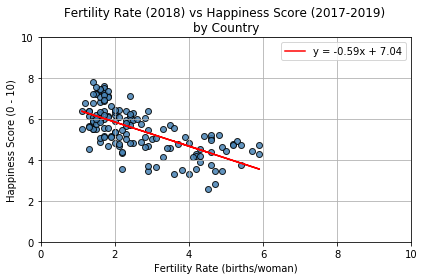

In [30]:
x_values = main_df['Fertility Rate in 2018 (births/woman)']
y_values = main_df['Happiness Score (0 - 10)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}.")

plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black", alpha = 0.85)
plt.plot(x_values,regress_values,"r-", label = line_eq)
plt.title('Fertility Rate (2018) vs Happiness Score (2017-2019) \nby Country')
plt.xlabel('Fertility Rate (births/woman)')
plt.ylabel('Happiness Score (0 - 10)')
plt.grid(b=True, which='major', axis='both')
plt.ylim(0,10)
plt.xlim(0,10)
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("Fertility Rate vs Happiness Score")
plt.show()

The scatter plot indicates a moderate negative linear association between a country's Happiness Score and its average Fertility Rates. The correlation coefficient for these two variables is R=-0.6618. There appears to be a moderate relationship between the two variables. It's interesting to see the data show us that for many countries the Happiness Score decreases as the Fertility Rate increases.

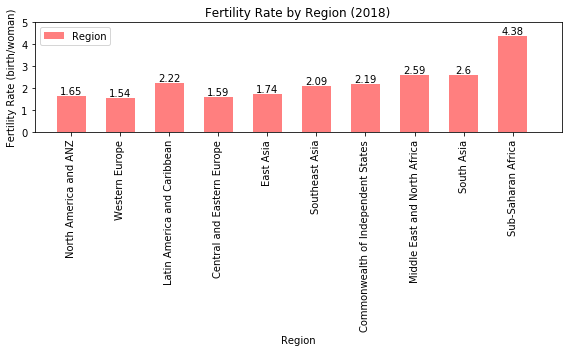

In [31]:
x_axis = np.arange(len(region_df2.index))
y_axis = region_df2['Fertility Rate in 2018 (births/woman)']
tick_locations = [value for value in x_axis]

plt.figure(figsize=(8,5))
plt.bar(x_axis, y_axis, width = 0.6, color='red', alpha=0.5, label='Region')

for i in range(len(y_axis)):
    plt.annotate(round(y_axis[i],2), xy=(x_axis[i],y_axis[i]), ha='center', va='bottom')

plt.title('Fertility Rate by Region (2018)')
plt.xticks(tick_locations, region_df2.index, rotation = "vertical")
plt.xlabel('Region')
plt.ylabel('Fertility Rate (birth/woman)')
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, 5)
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("Average Fertility Rate by Region")
plt.show()

The r-value is: 0.6753832624453602.


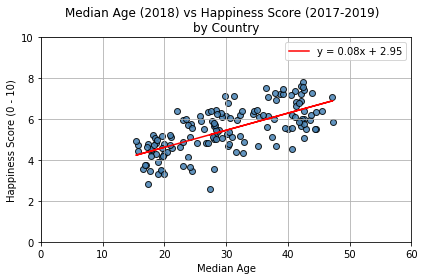

In [32]:
x_values = main_df['Median Age in 2018']
y_values = main_df['Happiness Score (0 - 10)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}.")

plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black", alpha = 0.85)
plt.plot(x_values,regress_values,"r-", label = line_eq)
plt.title('Median Age (2018) vs Happiness Score (2017-2019)  \nby Country')
plt.xlabel('Median Age')
plt.ylabel('Happiness Score (0 - 10)')
plt.grid(b=True, which='major', axis='both')
plt.ylim(0,10)
plt.xlim(0,60)
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("Median Age vs Happiness Score")
plt.show()

The scatter plot indicates a moderate positive linear association between a country's Happiness Score and its Median Age. The correlation coefficient for these two variables is R=0.6753. There appears to be a moderate relationship between the two variables. It's interesting to see the data show us that for many countries, the Happiness Score increases as the Median Age increases.

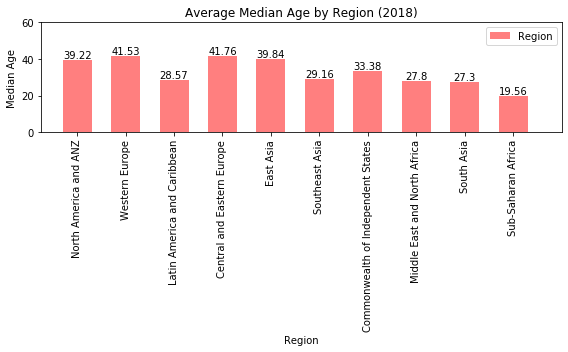

In [33]:
x_axis = np.arange(len(region_df2.index))
y_axis = region_df2['Median Age in 2018']
tick_locations = [value for value in x_axis]

plt.figure(figsize=(8,5))
plt.bar(x_axis, y_axis, width = 0.6, color='red', alpha=0.5, label='Region')

for i in range(len(y_axis)):
    plt.annotate(round(y_axis[i],2), xy=(x_axis[i],y_axis[i]), ha='center', va='bottom')

plt.title('Average Median Age by Region (2018)')
plt.xticks(tick_locations, region_df2.index, rotation = "vertical")
plt.xlabel('Region')
plt.ylabel('Median Age')
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, 60)
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("Average Median Age by Region")
plt.show()

The r-value is: 0.6676985901907981.


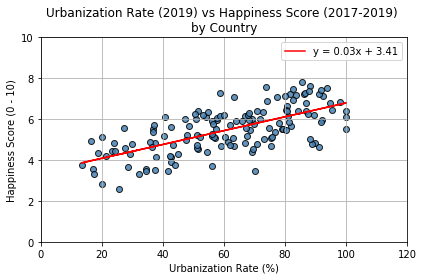

In [34]:
x_values = main_df['Urbanization Rate in 2019 (%)']
y_values = main_df['Happiness Score (0 - 10)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}.")

plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black", alpha = 0.85)
plt.plot(x_values,regress_values,"r-", label = line_eq)
plt.title('Urbanization Rate (2019) vs Happiness Score (2017-2019) \nby Country')
plt.xlabel('Urbanization Rate (%)')
plt.ylabel('Happiness Score (0 - 10)')
plt.grid(b=True, which='major', axis='both')
plt.ylim(0,10)
plt.xlim(0,120)
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("Urbanization Rate vs Happiness Score")
plt.show()

The scatter plot indicates a moderate positive linear association between a country's Happiness Score and Urbanization Population in 2019. The correlation coefficient for these two variables is R=0.6676. There appears to be a moderate relationship between the two variables. It's interesting to see the data show us that for many countries the Happiness Score is higher when more of the population is urbanized.

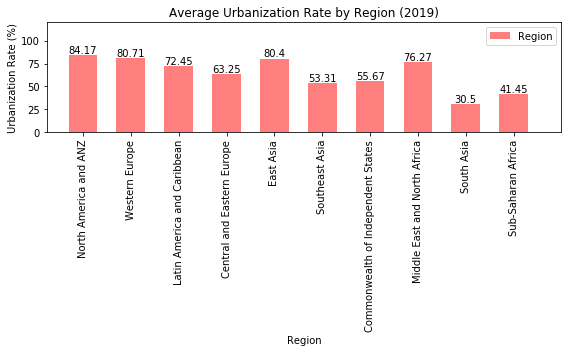

In [35]:
x_axis = np.arange(len(region_df2.index))
y_axis = region_df2['Urbanization Rate in 2019 (%)']
tick_locations = [value for value in x_axis]

plt.figure(figsize=(8,5))
plt.bar(x_axis, y_axis, width = 0.6, color='red', alpha=0.5, label='Region')

for i in range(len(y_axis)):
    plt.annotate(round(y_axis[i],2), xy=(x_axis[i],y_axis[i]), ha='center', va='bottom')

plt.title('Average Urbanization Rate by Region (2019)')
plt.xticks(tick_locations, region_df2.index, rotation = "vertical")
plt.xlabel('Region')
plt.ylabel('Urbanization Rate (%)')
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, 120)
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("Average Urbanization Rate by Region")
plt.show()

The r-value is: -0.4712572032841189.


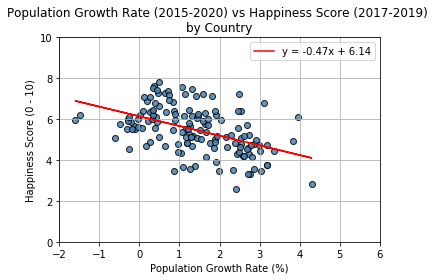

In [36]:
x_values = main_df['Population Growth: 2015-2020 (%)']
y_values = main_df['Happiness Score (0 - 10)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}.")

plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black", alpha = 0.85)
plt.plot(x_values,regress_values,"r-", label = line_eq)
plt.title('Population Growth Rate (2015-2020) vs Happiness Score (2017-2019) \nby Country')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Happiness Score (0 - 10)')
plt.grid(b=True, which='major', axis='both')
plt.ylim(0,10)
plt.xlim(-2,6)
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("Population Growth vs Happiness Score")
plt.show()

The scatter plot indicates a semi-moderate negative linear association between a country's Happiness Score and Population Growth Rate (estimated 2015-2020). The correlation coefficient for these two variables is R=-0.4712. There appears to be a semi-moderate relationship between the two variables. It's interesting to see the data show us that for some countries the Happiness Score decreases as the Population Growth Rate increases.

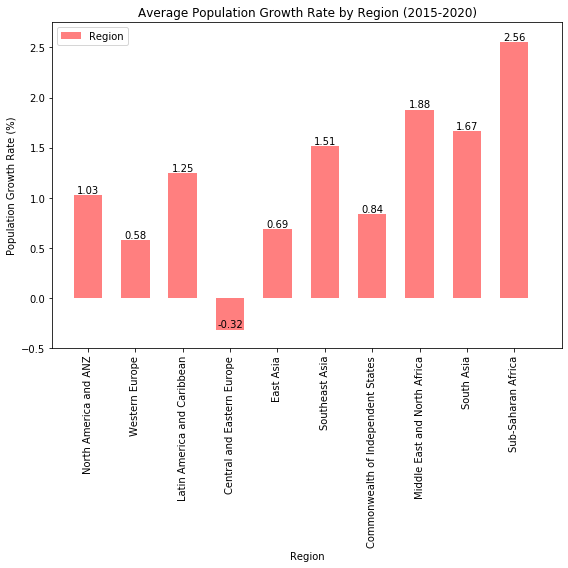

In [45]:
x_axis = np.arange(len(region_df2.index))
y_axis = region_df2['Population Growth: 2015-2020 (%)']
tick_locations = [value for value in x_axis]

plt.figure(figsize=(8,8))
plt.bar(x_axis, y_axis, width = 0.6, color='red', alpha=0.5, label='Region')

for i in range(len(y_axis)):
    plt.annotate(round(y_axis[i],2), xy=(x_axis[i],y_axis[i]), ha='center', va='bottom')

plt.title('Average Population Growth Rate by Region (2015-2020)')
plt.xticks(tick_locations, region_df2.index, rotation = "vertical")
plt.xlabel('Region')
plt.ylabel('Population Growth Rate (%)')
plt.xlim(-0.75, len(x_axis))
plt.ylim(-.5, 2.75)
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("Average Population Growth Rate by Region")
plt.show()

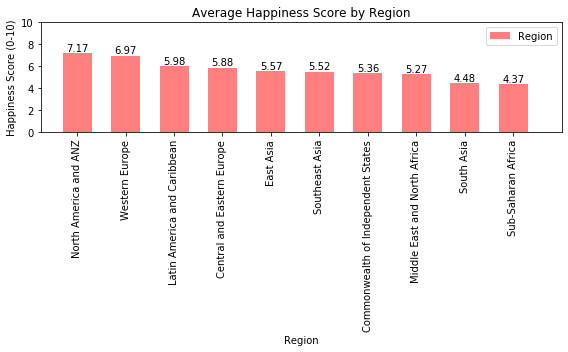

In [38]:
x_axis = np.arange(len(region_df2.index))
y_axis = region_df2['Happiness Score (0 - 10)']
tick_locations = [value for value in x_axis]

plt.figure(figsize=(8,5))
plt.bar(x_axis, y_axis, width = 0.6, color='red', alpha=0.5, label='Region')

for i in range(len(y_axis)):
    plt.annotate(round(y_axis[i],2), xy=(x_axis[i],y_axis[i]), ha='center', va='bottom')

plt.title('Average Happiness Score by Region')
plt.xticks(tick_locations, region_df2.index, rotation = "vertical")
plt.xlabel('Region')
plt.ylabel('Happiness Score (0-10)')
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, 10)
plt.legend(loc="best")
plt.tight_layout()
#plt.savefig("Average Happiness Score by Region")
plt.show()